In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data set
data=pd.read_csv("C:\\Users\\fahad\\OneDrive\\Desktop\\Unified mentor\\Proj 1 furniture\\ecommerce_furniture_dataset_2024.csv")

In [4]:
# Inspect the first 5 rows 
data.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [5]:
# Find No. of rows and columns
data.shape

(2000, 5)

In [6]:
# Check for null values 
data.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [7]:
# Delete the column : "originalPrice"
data=data.drop(["originalPrice"], axis=1)
data.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$21.37,1,Free shipping


In [8]:
# Delete null values from tagText
data=data.dropna(subset=["tagText"])
data.isnull().sum()

productTitle    0
price           0
sold            0
tagText         0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   productTitle  1997 non-null   object
 1   price         1997 non-null   object
 2   sold          1997 non-null   int64 
 3   tagText       1997 non-null   object
dtypes: int64(1), object(3)
memory usage: 78.0+ KB


In [10]:
# remove the $ and , sign from "Price"
data["price"]=data["price"].str.replace("$","")
data["price"]=data["price"].str.replace(",","")

In [11]:
data.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


In [12]:
# Change the data type of the "price"
data["price"]=data["price"].astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   productTitle  1997 non-null   object 
 1   price         1997 non-null   float64
 2   sold          1997 non-null   int64  
 3   tagText       1997 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 78.0+ KB


In [14]:
data["tagText"].value_counts()

tagText
Free shipping         1880
+Shipping: $5.09         9
+Shipping: $239.64       2
+Shipping: $80.21        2
+Shipping: $94.92        2
                      ... 
+Shipping: $134.27       1
+Shipping: $151.69       1
+Shipping: $41.93        1
+Shipping: $78.61        1
+Shipping: $171.49       1
Name: count, Length: 100, dtype: int64

In [15]:
# Replace all the values of tagText except free shipping
data["tagText"]=data["tagText"].apply(lambda x: x if x=="Free shipping" else "Paid shipping")
data["tagText"].value_counts()

tagText
Free shipping    1880
Paid shipping     117
Name: count, dtype: int64

In [16]:
#add new column "Total Cost"
data["Total Cost"]=data["price"]*data["sold"]
data.head()

,productTitle,price,sold,tagText,Total Cost
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping,28074.00
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping,0.00
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping,276.22
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping,0.00
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping,21.37


C:\Users\fahad\AppData\Local\Temp\ipykernel_30300\693382780.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["sold"], kde=True)


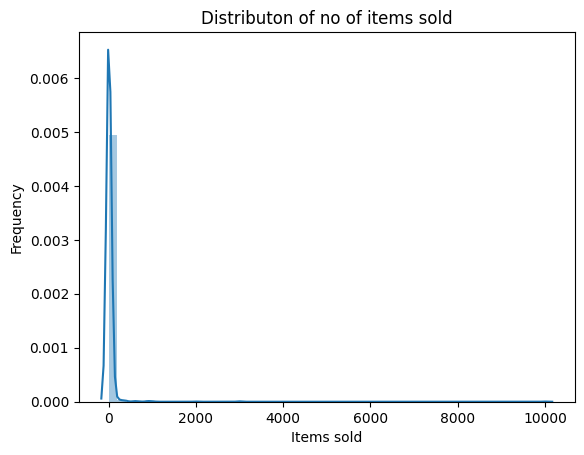

In [17]:
# Distributon of no of items sold
sns.distplot(data["sold"], kde=True)
plt.title("Distributon of no of items sold")
plt.xlabel("Items sold")
plt.ylabel("Frequency")
plt.show()

C:\Users\fahad\AppData\Local\Temp\ipykernel_30300\4033629908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price"], kde=True)


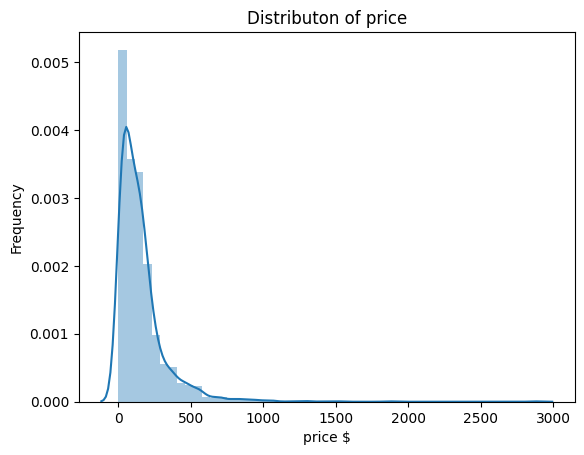

In [18]:
# Distributon of price 
sns.distplot(data["price"], kde=True)
plt.title("Distributon of price")
plt.xlabel("price $")
plt.ylabel("Frequency")
plt.show()

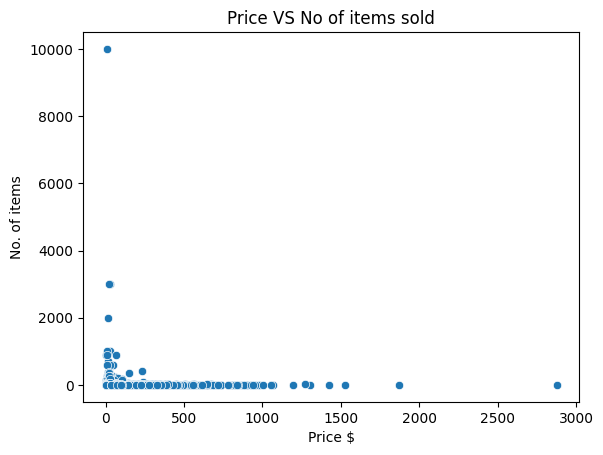

In [19]:
# The relationship between quantity sold and price
sns.scatterplot(x="price", y="sold", data=data)
plt.title("Price VS No of items sold")
plt.xlabel("Price $")
plt.ylabel("No. of items")
plt.show()         

In [20]:
# This visual shows that there is inverse relationship between Price and No of items sold
# As the price Incrases the No. of items sold sharply drops

In [21]:
# The No. of Items sold by 'Tagtext'
items_sold_by_tagtext = data.groupby("tagText")["sold"].sum()
items_sold_by_tagtext

tagText
Free shipping    44452
Paid shipping     2516
Name: sold, dtype: int64

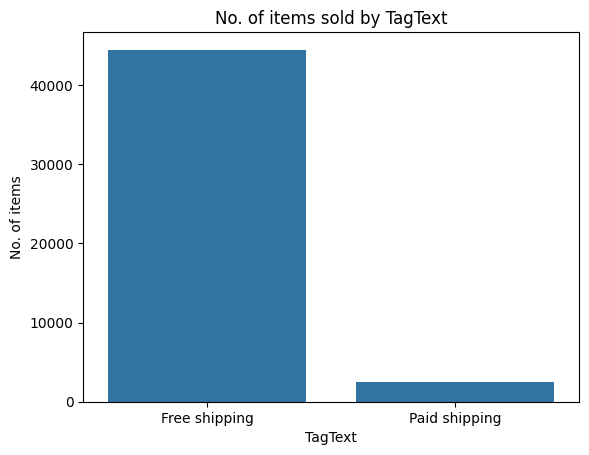

In [22]:
sns.barplot(x=items_sold_by_tagtext.index, y=items_sold_by_tagtext.values)
plt.title("No. of items sold by TagText")
plt.xlabel("TagText")
plt.ylabel("No. of items")
plt.show()      